# CIFAR-100 Dataset

Loading the dataset

In [1]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Printing the shape of the training and testing images

In [2]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Printing the shape of the labels



In [3]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

Printing the total number of classes (the unique numbers from the train labels)

In [4]:
import numpy as np

classes = np.unique(y_train)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Creating a dictionary with the names of the classes

In [5]:
label_dict = {
0: 'apple',
1: 'aquarium_fish',
2: 'baby',
3: 'bear',
4: 'beaver',
5: 'bed',
6: 'bee',
7: 'beetle',
8: 'bicycle',
9: 'bottle',
10: 'bowl',
11: 'boy',
12: 'bridge',
13: 'bus',
14: 'butterfly',
15: 'camel',
16: 'can',
17: 'castle',
18: 'caterpillar',
19: 'cattle',
20: 'chair',
21: 'chimpanzee',
22: 'clock',
23: 'cloud',
24: 'cockroach',
25: 'couch',
26: 'crab',
27: 'crocodile',
28: 'cup',
29: 'dinosaur',
30: 'dolphin',
31: 'elephant',
32: 'flatfish',
33: 'forest',
34: 'fox',
35: 'girl',
36: 'hamster',
37: 'house',
38: 'kangaroo',
39: 'computer_keyboard',
40: 'lamp',
41: 'lawn_mower',
42: 'leopard',
43: 'lion',
44: 'lizard',
45: 'lobster',
46: 'man',
47: 'maple_tree',
48: 'motorcycle',
49: 'mountain',
50: 'mouse',
51: 'mushroom',
52: 'oak_tree',
53: 'orange',
54: 'orchid',
55: 'otter',
56: 'palm_tree',
57: 'pear',
58: 'pickup_truck',
59: 'pine_tree',
60: 'plain',
61: 'plate',
62: 'poppy',
63: 'porcupine',
64: 'possum',
65: 'rabbit',
66: 'raccoon',
67: 'ray',
68: 'road',
69: 'rocket',
70: 'rose',
71: 'sea',
72: 'seal',
73: 'shark',
74: 'shrew',
75: 'skunk',
76: 'skyscraper',
77: 'snail',
78: 'snake',
79: 'spider',
80: 'squirrel',
81: 'streetcar',
82: 'sunflower',
83: 'sweet_pepper',
84: 'table',
85: 'tank',
86: 'telephone',
87: 'television',
88: 'tiger',
89: 'tractor',
90: 'train',
91: 'trout',
92: 'tulip',
93: 'turtle',
94: 'wardrobe',
95: 'whale',
96: 'willow_tree',
97: 'wolf',
98: 'woman',
99: 'worm',
}

Displaying the first image in the training and the test data

Text(0.5, 1.0, '(Label: cattle)')
Text(0.5, 1.0, '(Label: mountain)')


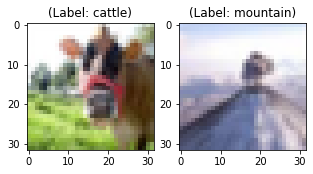

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
index = 0
plt.subplot(121)
curr_img = np.reshape(x_train[index], (32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_train[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

# Display the first image in testing data
index = 0
plt.subplot(122)
curr_img = np.reshape(x_test[index],(32,32,3))
plt.imshow(curr_img)
curr_label = str(label_dict[y_test[index][0]])
print(plt.title('(Label: {})'.format(curr_label)))

## Visualizing the data

Checking the minimum and the maximum values of the training images

In [7]:
np.min(x_train),np.max(x_train)

(0, 255)

Normalizing the pixels between 0 and 1 inclusive

In [8]:
x_train_normalized = x_train/np.max(x_train)

np.min(x_train_normalized),np.max(x_train_normalized)

(0.0, 1.0)

In [9]:
x_train_normalized.shape

(50000, 32, 32, 3)

Reshaping the image dimensions from three to one (flattening the images)

In [10]:
from functools import reduce

n_cols = reduce((lambda x, y: x * y), x_train_normalized.shape[1:])
print(n_cols)

x_train_flat = x_train_normalized.reshape(-1, n_cols)
x_train_flat.shape

3072


(50000, 3072)

Creating a DataFrame that holds the pixel values of the images with their respective labels in a row-column format

The shape should be (50000, 3073) (3072+1 because of the added labels) 

In [11]:
feat_cols = ['pixel{}'.format(str(i)) for i in range(x_train_flat.shape[1])]

import pandas as pd

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

df_cifar['label'] = y_train
df_cifar.shape

(50000, 3073)

In [12]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.498039,0.627451,0.266667,0.454902,0.603922,0.188235,0.431373,0.592157,0.098039,0.439216,0.533333,0.168627,0.494118,0.478431,0.290196,0.521569,0.450980,0.298039,0.415686,0.447059,0.184314,0.443137,0.549020,0.184314,0.298039,0.305882,0.094118,0.074510,0.035294,0.015686,0.133333,0.141176,0.039216,0.411765,0.521569,0.231373,0.541176,0.678431,0.309804,19
1,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.988235,0.992157,0.992157,0.988235,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,1.000000,1.000000,1.000000,29
2,0.980392,0.980392,0.972549,0.972549,0.976471,0.952941,0.968627,0.972549,0.937255,0.972549,0.968627,0.937255,0.976471,0.964706,0.937255,0.976471,0.964706,0.937255,0.972549,0.964706,0.933333,0.972549,0.960784,0.933333,0.968627,0.956863,0.933333,0.968627,0.956863,0.929412,0.968627,0.952941,0.929412,0.964706,0.949020,0.917647,0.960784,0.937255,0.898039,0.960784,...,0.858824,0.835294,0.792157,0.862745,0.831373,0.776471,0.866667,0.831373,0.772549,0.870588,0.835294,0.772549,0.866667,0.831373,0.768627,0.862745,0.827451,0.756863,0.858824,0.823529,0.749020,0.858824,0.823529,0.745098,0.854902,0.819608,0.741176,0.858824,0.819608,0.745098,0.858824,0.819608,0.760784,0.874510,0.847059,0.811765,0.909804,0.901961,0.894118,0
3,0.486275,0.760784,0.866667,0.513725,0.792157,0.894118,0.529412,0.807843,0.894118,0.541176,0.823529,0.894118,0.549020,0.835294,0.894118,0.564706,0.850980,0.905882,0.580392,0.866667,0.905882,0.596078,0.878431,0.913725,0.611765,0.890196,0.921569,0.619608,0.898039,0.925490,0.627451,0.898039,0.925490,0.631373,0.901961,0.921569,0.647059,0.917647,0.937255,0.674510,...,0.890196,0.847059,0.815686,0.831373,0.803922,0.768627,0.780392,0.780392,0.745098,0.807843,0.811765,0.776471,0.843137,0.839216,0.807843,0.890196,0.874510,0.843137,0.901961,0.874510,0.847059,0.913725,0.878431,0.850980,0.909804,0.890196,0.866667,0.878431,0.898039,0.874510,0.901961,0.929412,0.909804,0.952941,0.929412,0.925490,0.952941,0.901961,0.905882,11
4,0.168627,0.192157,0.180392,0.125490,0.156863,0.133333,0.341176,0.349020,0.184314,0.498039,0.494118,0.286275,0.215686,0.219608,0.133333,0.188235,0.180392,0.176471,0.200000,0.200000,0.156863,0.341176,0.364706,0.203922,0.474510,0.513725,0.290196,0.443137,0.501961,0.235294,0.529412,0.627451,0.309804,0.494118,0.623529,0.301961,0.466667,0.592157,0.298039,0.478431,...,0.643137,0.494118,0.247059,0.811765,0.666667

PCA - keeping 3 components, then applying `fit_transform` on the training data

In [13]:
from sklearn.decomposition import PCA

pca_cifar = PCA(n_components=3)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

Converting from a numpy array to a pandas DataFrame

In [14]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_cifar_Df['y'] = y_train

principal_cifar_Df.head()

,principal component 1,principal component 2,principal component 3,y
0,4.256368,-3.970575,-1.770571,19
1,18.912235,2.751527,-6.383192,29
2,12.053192,-5.700178,-3.665987,0
3,8.888664,4.344497,-2.709833,11
4,-5.656659,0.831064,2.976110,1


Printing the **variance**

In [15]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.33491339 0.09368353 0.06972268]


Visualizing the CIFAR-100 data in two-dimensions using PC1 and PC2

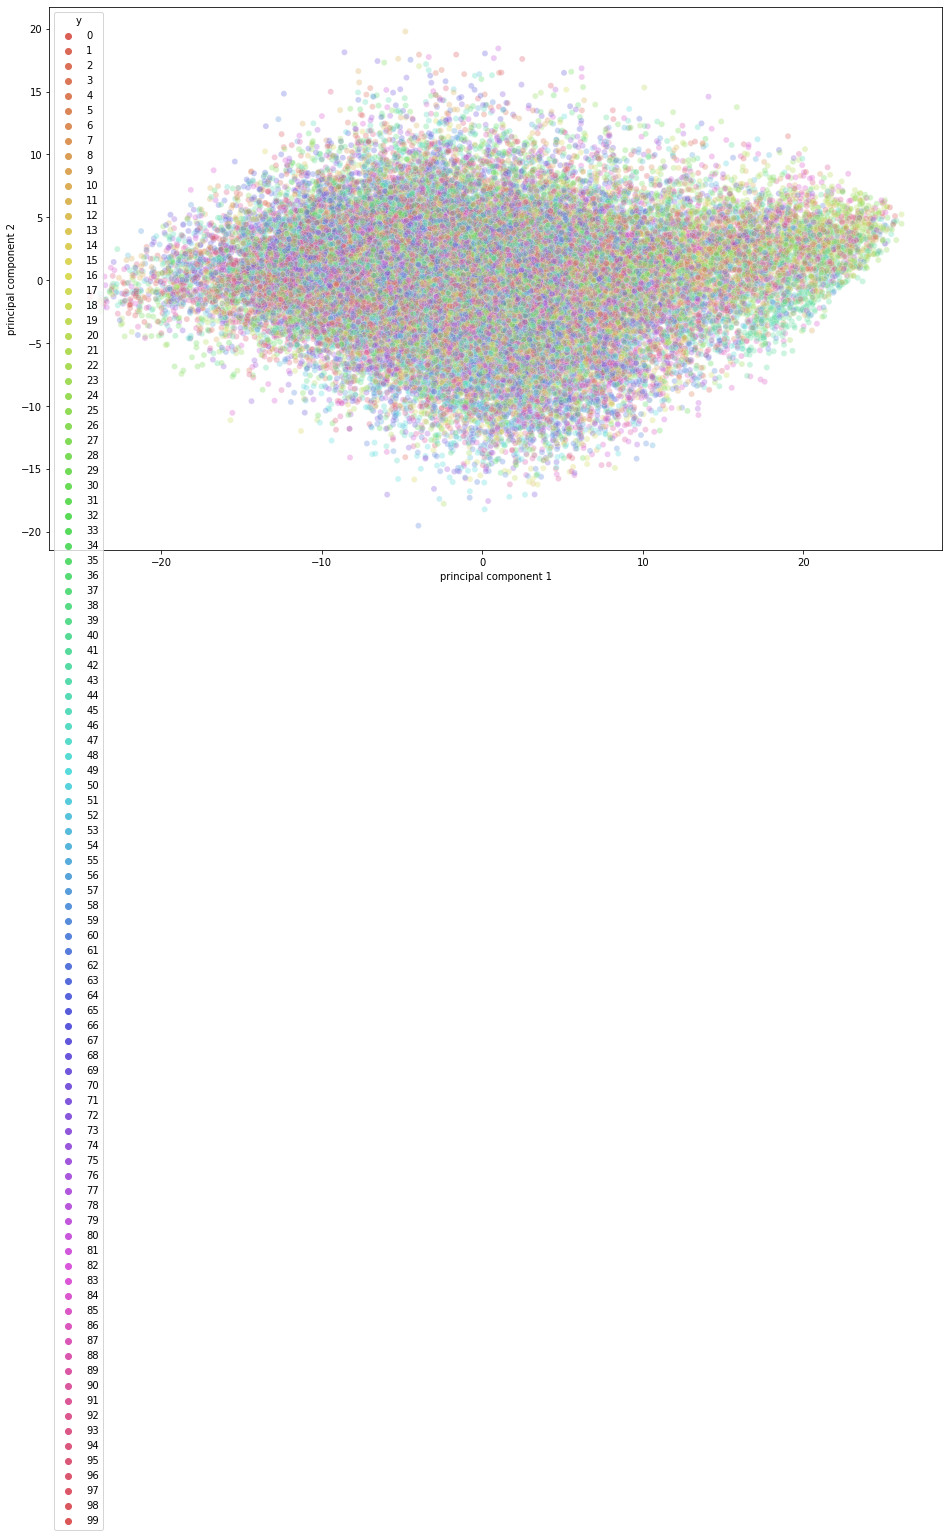

In [16]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="y",
    palette=sns.color_palette('hls', 100),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

Plot for PC2 vs PC3

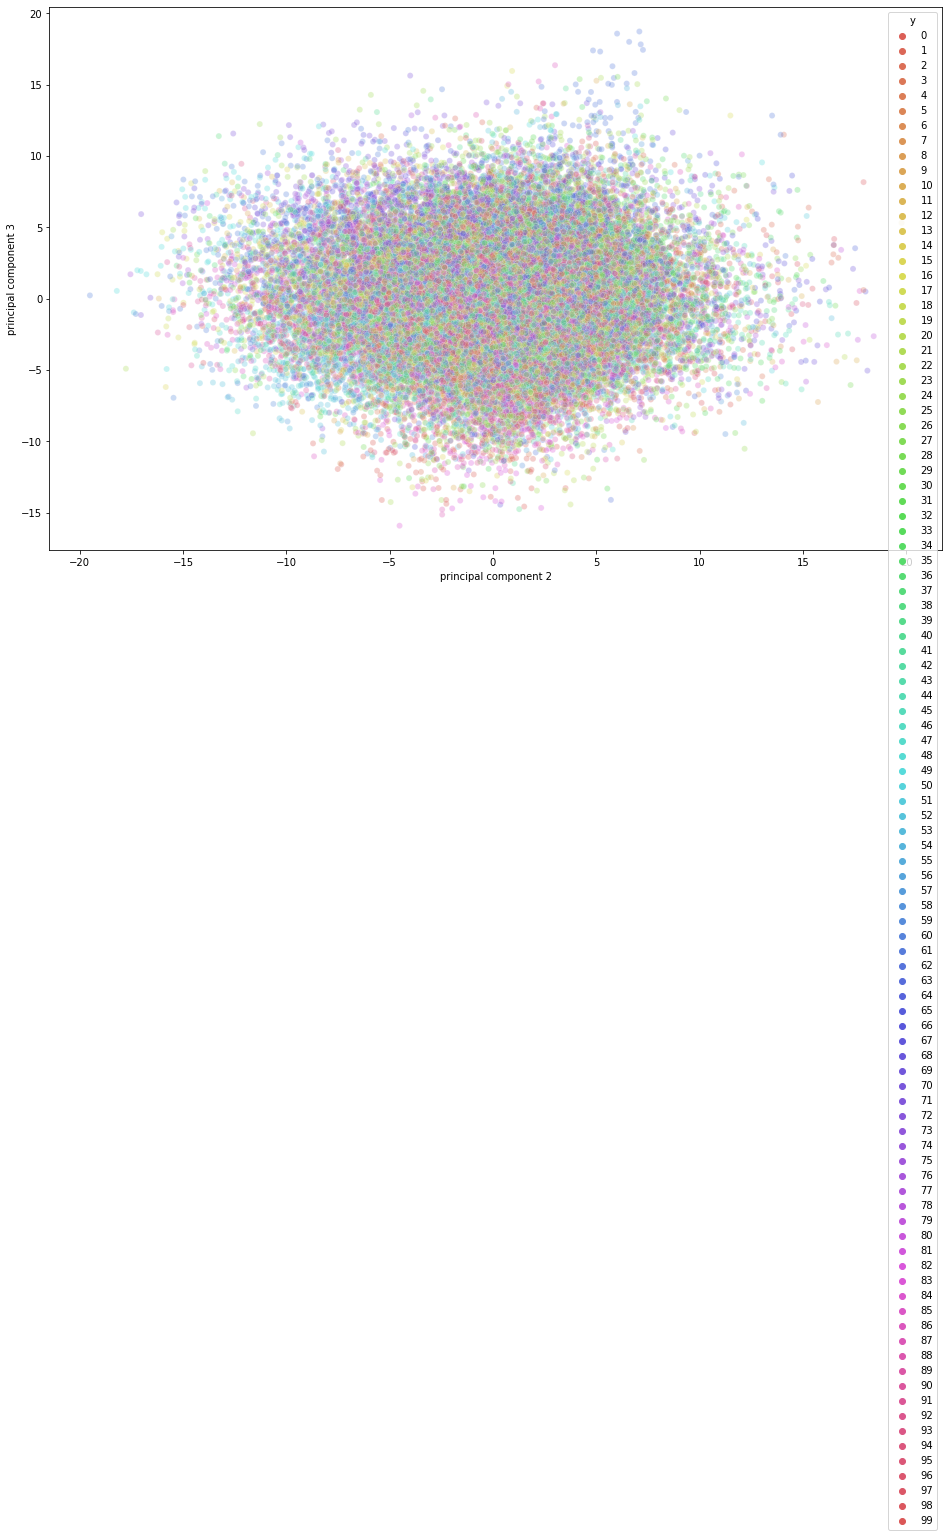

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='principal component 2', y='principal component 3',
    hue="y",
    palette=sns.color_palette('hls', 100),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

## Speed Up Deep Learning Training using PCA with CIFAR-100 Dataset

Normalizing and rehaping the test data

In [18]:
x_test_normalized = x_test/np.max(x_test)

x_test_flat = x_test_normalized.reshape(-1, n_cols)
x_test_flat.shape

(10000, 3072)

In [19]:
pca = PCA(0.9)

pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.n_components_

87

In [21]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Training with PCA

In [23]:
batch_size = 128
num_classes = nClasses
num_components = pca.n_components_
epochs = 20

In [24]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(num_components,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              90112     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
Total params: 1,821,540
Trainable params: 1,821,540
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 3.9984 - accuracy: 0.1002 - val_loss: 3.4309 - val_accuracy: 0.1852
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 3.2127 - accuracy: 0.2228 - val_loss: 3.2201 - val_accuracy: 0.2312
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 2.8534 - accuracy: 0.2932 - val_loss: 3.1161 - val_accuracy: 0.2544
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 2.5290 - accuracy: 0.3557 - val_loss: 3.1027 - val_accuracy: 0.2692
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 2.1911 - accuracy: 0.4250 - val_loss: 3.1407 - val_accuracy: 0.2808
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 1.8772 - accuracy: 0.4934 - val_loss: 3.3329 - val_accuracy: 0.2772
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 1.5096 - accuracy: 0.5827 - val_loss: 3.4752 - val_accuracy: 0.2823
Epoch 

Training without PCA

In [26]:
batch_size = 128
num_classes = nClasses
num_components = n_cols
epochs = 20

In [27]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(num_components,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25700     
Total params: 4,878,180
Trainable params: 4,878,180
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 4.9003 - accuracy: 0.0287 - val_loss: 4.0269 - val_accuracy: 0.0715
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 3.9625 - accuracy: 0.0917 - val_loss: 3.9152 - val_accuracy: 0.1090
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 3.7067 - accuracy: 0.1321 - val_loss: 3.6439 - val_accuracy: 0.1499
Epoch 4/20
391/391 [==============================] - 2s 5ms/step - loss: 3.5660 - accuracy: 0.1563 - val_loss: 3.5380 - val_accuracy: 0.1687
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 3.4535 - accuracy: 0.1741 - val_loss: 3.5650 - val_accuracy: 0.1730
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 3.3525 - accuracy: 0.1924 - val_loss: 3.5151 - val_accuracy: 0.1816
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 3.2520 - accuracy: 0.2147 - val_loss: 3.5257 - val_accuracy: 0.1751
Epoch 